In [3]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

In [17]:
# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

In [18]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [19]:
# Read in data into a dataframe 
data = pd.read_csv('train-missings.csv')

# Display top of dataframe
data.head()

,Id,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,target
0,1,2596.0,NaN,3.0,NaN,0.0,NaN,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,5
1,2,2590.0,56.0,2.0,212.0,NaN,390.0,220.0,NaN,NaN,6225.0,1.0,0.0,0.0,5
2,3,2804.0,NaN,9.0,268.0,65.0,3180.0,NaN,238.0,NaN,6121.0,NaN,0.0,0.0,2
3,4,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,NaN,0.0,2
4,5,2595.0,45.0,NaN,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,5


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 15 columns):
Id        15120 non-null int64
p1        12156 non-null float64
p2        12188 non-null float64
p3        12096 non-null float64
p4        12071 non-null float64
p5        12083 non-null float64
p6        12057 non-null float64
p7        12151 non-null float64
p8        12035 non-null float64
p9        12073 non-null float64
p10       12152 non-null float64
p11       12031 non-null float64
p12       12031 non-null float64
p13       12198 non-null float64
target    15120 non-null int64
dtypes: float64(13), int64(2)
memory usage: 1.7 MB


In [21]:
data=data.drop("Id",axis=1)
data.describe()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,target
count,12156.000000,12188.000000,12096.000000,12071.000000,12083.000000,12057.000000,12151.000000,12035.000000,12073.000000,12152.000000,12031.000000,12031.000000,12198.000000,15120.000000
mean,2746.864676,155.722432,16.525132,226.259796,50.931226,1704.409969,212.594272,219.061903,135.032966,1511.744651,0.239631,0.032250,0.418675,4.000000
std,417.908441,109.820171,8.459560,208.777715,61.161804,1319.590597,30.485857,22.797792,45.789227,1098.104397,0.426876,0.176671,0.493362,2.000066
min,1879.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2371.000000,64.000000,10.000000,67.000000,5.000000,755.000000,196.000000,207.000000,106.000000,726.000000,0.000000,0.000000,0.000000,2.000000
50%,2751.000000,125.000000,15.000000,180.000000,32.000000,1307.000000,220.000000,223.000000,138.000000,1262.500000,0.000000,0.000000,0.000000,4.000000
75%,3101.000000,259.000000,22.000000,324.000000,79.000000,2256.000000,235.000000,236.000000,167.000000,1989.000000,0.000000,0.000000,1.000000,6.000000
max,3849.000000,360.000000,52.000000,1318.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6853.000000,1.000000,1.000000,1.000000,7.000000


In [22]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [16]:
missing_values_table(data)

Your selected dataframe has 14 columns.
There are 13 columns that have missing values.


,Missing Values,% of Total Values
p11,3089,20.4
p12,3089,20.4
p8,3085,20.4
p6,3063,20.3
p4,3049,20.2
p9,3047,20.2
p5,3037,20.1
p3,3024,20.0
p7,2969,19.6
p10,2968,19.6


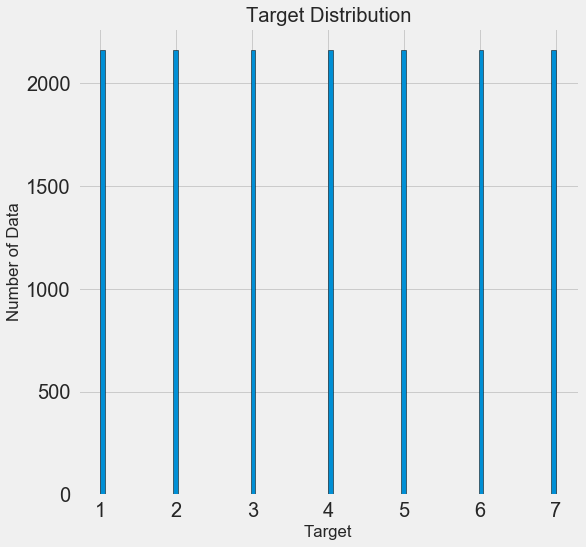

In [24]:
figsize(8, 8)

# Histogram of the target
plt.style.use('fivethirtyeight')
plt.hist(data['target'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Target'); plt.ylabel('Number of Data'); 
plt.title('Target Distribution');